In [9]:
#import modules
import pandas as pd
import numpy as np

#Box-Cox transformations
from scipy import stats

#for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

#read in data from kaggle 
ks_data = pd.read_csv(r'D:\Python\Data\ks-projects-201801.csv')

#set random seed to enable reproducibility of results
np.random.seed(0)

ks_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


D:\Python\Anaconda\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

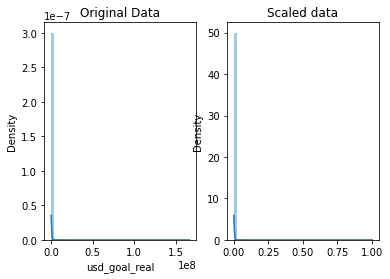

In [5]:
#select usd_goal column from dataset
usd_goal = ks_data.usd_goal_real

#scale goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(ks_data.usd_goal_real, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled data")

D:\Python\Anaconda\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

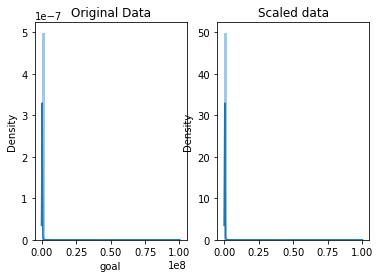

In [11]:
#select goal column from dataset
goal_col = ks_data.goal

#scale goals from 0 to 1
scaled_data_goal = minmax_scaling(goal_col, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(ks_data.goal, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data_goal, ax = ax[1])
ax[1].set_title("Scaled data")

D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalised data')

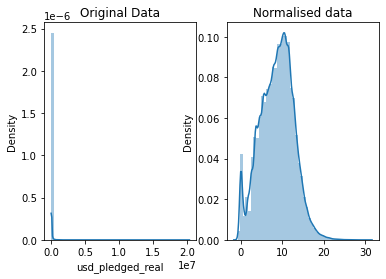

In [13]:
#get the index of all poitive pledges

index_of_positive_pledges = ks_data.usd_pledged_real > 0

#get only positive pledges(using index)
positive_pledges = ks_data.usd_pledged_real.loc[index_of_positive_pledges]

#normalise the pledges with box-cox
normalised_pledges = stats.boxcox(positive_pledges)[0]

#plot together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalised_pledges, ax = ax[1])
ax[1].set_title("Normalised data")